In [10]:
from neurodiffeq import diff
from neurodiffeq.solvers import Solver1D, Solver2D
from neurodiffeq.conditions import IVP, DirichletBVP2D
from neurodiffeq.networks import FCNN, SinActv
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [33]:
g = 9.8
L = 1
k=2
w0 = np.sqrt(g/L)
wprime = np.sqrt(2*k+g/L)
theta0 = 1
# print(w0)
# print(wprime)
print((w0+wprime)/2)
print((w0-wprime)/2)

3.422665146350524
-0.2921699778508182


In [62]:
def ode_system(theta_1, theta_2, t): 
    return [diff(theta_1,t,order=2)+np.power(w0,2)*theta_1+k*theta_1-k*theta_2, diff(theta_2,t,order=2)+np.power(w0,2)*theta_2-k*theta_1+k*theta_2]

conditions = [IVP(t_0=0.0, u_0=theta0, u_0_prime=0.0), IVP(t_0=0.0, u_0=0.0, u_0_prime=0.0)]
nets = [FCNN(actv=SinActv), FCNN(actv=SinActv)]

solver = Solver1D(ode_system, conditions, t_min=0.1, t_max=30.0, nets = nets)
solver.fit(max_epochs=100000)
solution = solver.get_solution()

Training Progress:   0%|                                                                                     |…

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'tor

In [57]:
t = np.linspace(0.1, 30.0, 1000)
theta_1, theta_2 = solution(t, to_numpy=True)

In [58]:
theta_1_an = theta0*np.cos(((w0+wprime)/2)*t)*np.cos(((w0-wprime)/2)*t)
theta_2_an = theta0*np.sin(((w0+wprime)/2)*t)*np.sin(((wprime-w0)/2)*t)

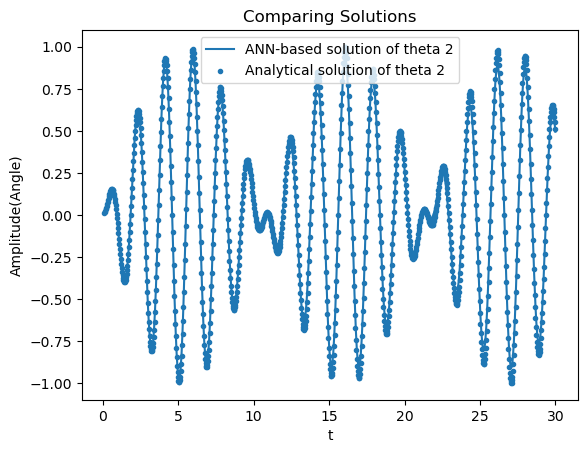

In [61]:
plt.title("Comparing Solutions")
plt.ylabel('Amplitude(Angle)')
plt.xlabel('t')
# plt.plot(t, theta_1, label='ANN-based solution of theta 1')
# plt.scatter(t,theta_1_an,label='Analytical solution of theta 1',marker=".")
plt.plot(t, theta_2, label='ANN-based solution of theta 2')
plt.scatter(t,theta_2_an,label='Analytical solution of theta 2',marker=".")
plt.legend()
plt.show()